## Intro a Bases de Datos Vectoriales

### Vectores en Python

In [1]:
# Ejemplo simple de un vector en Python
vector_palabra_perro = [0.32, 0.41]
vector_palabra_gato = [0.23, 0.47]


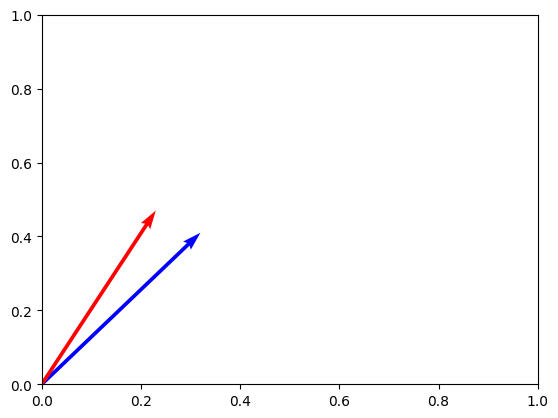

In [2]:
# Graficar los vectores
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.quiver(0, 0, vector_palabra_perro[0], vector_palabra_perro[1], angles='xy', scale_units='xy', scale=1, color='b')
ax.quiver(0, 0, vector_palabra_gato[0], vector_palabra_gato[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.draw()
plt.show()

In [3]:
# Importar una biblioteca para el cálculo de similitudes
from sklearn.metrics.pairwise import cosine_similarity

# Definir vectores de ejemplo
import numpy as np

vector_perro = np.array([[0.32, 0.41, 0.54, 0.67, 0.29]])
vector_gato = np.array([[0.31, 0.42, 0.55, 0.66, 0.30]])

# Calcular la similitud de coseno
similitud = cosine_similarity(vector_perro, vector_gato)
print(f'Similitud entre "perro" y "gato": {similitud[0][0]}')


Similitud entre "perro" y "gato": 0.9997754187400824


#### Modelos de Embeddings


- [OpenAI's Embeddings](https://platform.openai.com/docs/guides/embeddings)

- [The Hugging Face](https://huggingface.co/models?other=text-embedding&sort=trending)


In [32]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [39]:
def get_embedding_query(text):
   text = text.replace("\n", " ")
   return embeddings.embed_query(text)


In [37]:
query = "Who is the author of this paper?"
get_embedding_query(query)

[-0.0032382970675826073,
 -0.009041895158588886,
 -0.03258882835507393,
 -0.023689448833465576,
 0.005700669717043638,
 0.00612426083534956,
 0.014718811959028244,
 0.00039390043821185827,
 -0.00636178907006979,
 0.06859805434942245,
 0.011686372570693493,
 0.03543916344642639,
 0.005490853451192379,
 -0.012549391016364098,
 -0.013143210671842098,
 0.010942118242383003,
 -0.029865173622965813,
 -0.036896001547575,
 -0.03094196692109108,
 -0.005419594701379538,
 0.007327735889703035,
 -0.029120920225977898,
 -0.02639726735651493,
 0.046935513615608215,
 0.04620709270238876,
 0.036484286189079285,
 0.02419617585837841,
 0.0037093940190970898,
 -0.01201891154050827,
 0.041361525654792786,
 0.017545394599437714,
 0.03455239161849022,
 -0.020459068939089775,
 -0.03410900756716728,
 -0.008455993607640266,
 -0.049374133348464966,
 -0.008638097904622555,
 0.03984134644269943,
 -0.005277078133076429,
 0.03737105429172516,
 0.00743858190253377,
 0.0032382970675826073,
 -0.011282575316727161,
 -0

In [ ]:
! pip install openai numpy pandas scikit-learn

In [17]:
import os
import tiktoken
import numpy as np
import pandas as pd
from openai import OpenAI
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
! pip install pyarrow fastparquet

In [33]:
import pandas as pd

# Contenido detallado de dos artículos
articles = [
    {
        "title": "Impacto de la inteligencia artificial en la medicina moderna",
        "abstract": "Este estudio revisa los avances de la IA en medicina, desde diagnósticos asistidos por IA hasta la personalización de tratamientos.",
        "body_text": (
            "La inteligencia artificial (IA) ha transformado la práctica médica de manera significativa en la última década. "
            "Con avances en el aprendizaje profundo y las redes neuronales, los sistemas basados en IA ahora pueden diagnosticar enfermedades "
            "con precisión similar o incluso superior a la de los médicos humanos en ciertas áreas. Este artículo explora los impactos de la IA en "
            "la radiología, la oncología y otras especialidades, y cómo estas tecnologías permiten una personalización de tratamientos que mejora "
            "la eficacia de la atención al paciente. Además, se analizan los desafíos éticos y prácticos que enfrentan los profesionales médicos "
            "al integrar estas tecnologías en su práctica diaria, incluyendo preocupaciones sobre la privacidad de los datos y la responsabilidad en los diagnósticos."
        )
    },
    {
        "title": "Tendencias en el aprendizaje automático y su aplicación en la industria",
        "abstract": "Se exploran las aplicaciones actuales y las futuras tendencias del aprendizaje automático en la industria moderna.",
        "body_text": (
            "El aprendizaje automático ha crecido exponencialmente en los últimos años, integrándose en múltiples industrias y transformando procesos clave. "
            "Desde la manufactura, donde los sistemas predictivos optimizan las cadenas de suministro y el mantenimiento preventivo, hasta la logística, donde "
            "los algoritmos de optimización mejoran la gestión de inventarios y rutas, las aplicaciones del aprendizaje automático han demostrado un gran potencial "
            "para aumentar la eficiencia y reducir costos. Este artículo revisa los casos de éxito más destacados y las tecnologías emergentes como el aprendizaje por "
            "refuerzo y los modelos generativos. También se abordan las barreras a la adopción, incluyendo la falta de personal capacitado y los desafíos de la integración "
            "tecnológica en infraestructuras heredadas."
        )
    },
    {
        "title": "El impacto de la inteligencia artificial en la industria del entretenimiento",
        "abstract": "Una revisión de cómo la IA está transformando la creación de contenido, la recomendación de medios y la interacción con los usuarios.",
        "body_text": (
            "La industria del entretenimiento ha adoptado rápidamente la inteligencia artificial para mejorar la experiencia del usuario y optimizar la producción de contenido. "
            "Las plataformas de streaming utilizan algoritmos de recomendación basados en IA para sugerir contenido personalizado, mientras que las herramientas de creación asistida por "
            "IA permiten a los productores de contenido desarrollar guiones, gráficos y música con mayor eficiencia. Además, se está experimentando con tecnologías de deepfake y realidad "
            "aumentada para crear experiencias inmersivas. Este artículo analiza las ventajas y riesgos asociados con el uso de IA en esta industria."
        )
    },
    {
        "title": "Tácticas modernas en el fútbol: estrategias y gestión",
        "abstract": "EEste artículo examina cómo las tácticas modernas y la gestión avanzada están cambiando las estrategias en el fútbol.",
        "body_text": (
            "El fútbol ha experimentado una transformación con la adopción de nuevas tácticas y enfoques de gestión por parte de equipos y entrenadores. "
            "Estudiar patrones de juego, evaluar el rendimiento de los jugadores y optimizar las tácticas se ha vuelto fundamental para mantenerse competitivo. "
            "Los análisis detallados de partidos y entrenamientos permiten a los entrenadores sugerir mejoras y ajustar estrategias en tiempo real para "
            "predecir el comportamiento de los oponentes. Además, se ha hecho posible evaluar el riesgo de lesiones y desarrollar programas de entrenamiento "
            "personalizados. Este artículo presenta ejemplos prácticos de cómo estos enfoques están siendo adoptados por equipos de élite y ligas alrededor del mundo."
    )
    }
]

# Crear DataFrame
articles_df = pd.DataFrame(articles)

# Guardar en archivo Parquet
articles_df.to_parquet("../data/articles.parquet")

articles_df



,title,abstract,body_text
0,Impacto de la inteligencia artificial en la me...,Este estudio revisa los avances de la IA en me...,La inteligencia artificial (IA) ha transformad...
1,Tendencias en el aprendizaje automático y su a...,Se exploran las aplicaciones actuales y las fu...,El aprendizaje automático ha crecido exponenci...
2,El impacto de la inteligencia artificial en la...,Una revisión de cómo la IA está transformando ...,La industria del entretenimiento ha adoptado r...
3,Tácticas modernas en el fútbol: estrategias y ...,EEste artículo examina cómo las tácticas moder...,El fútbol ha experimentado una transformación ...


In [34]:
# Cargar datos (ejemplo con un archivo Parquet)
scientific_docs = pd.read_parquet("../data/articles.parquet")

# Mostrar las primeras filas
print(scientific_docs.head(5))


                                               title  \
0  Impacto de la inteligencia artificial en la me...   
1  Tendencias en el aprendizaje automático y su a...   
2  El impacto de la inteligencia artificial en la...   
3  Tácticas modernas en el fútbol: estrategias y ...   

                                            abstract  \
0  Este estudio revisa los avances de la IA en me...   
1  Se exploran las aplicaciones actuales y las fu...   
2  Una revisión de cómo la IA está transformando ...   
3  EEste artículo examina cómo las tácticas moder...   

                                           body_text  
0  La inteligencia artificial (IA) ha transformad...  
1  El aprendizaje automático ha crecido exponenci...  
2  La industria del entretenimiento ha adoptado r...  
3  El fútbol ha experimentado una transformación ...  


In [ ]:
def concatenate_columns_with_null_handling(df, body_text_column, abstract_column, title_column, new_col_name):
    df[new_col_name] = df[body_text_column].fillna('') + df[abstract_column].fillna('') + df[title_column].fillna('')
    return df

# Aplicar la función para crear la columna concatenada
new_scientific_docs = concatenate_columns_with_null_handling(
    scientific_docs, "body_text", "abstract", "title", "concatenated_text"
)

print(new_scientific_docs.head(3))


In [23]:
def num_tokens_from_text(text: str, encoding_name="cl100k_base"):
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(text))
    return num_tokens

new_scientific_docs['num_tokens'] = new_scientific_docs["concatenated_text"].apply(lambda x: num_tokens_from_text(x))

# Filtrar documentos con un máximo de 8191 tokens (límite del modelo)
smaller_tokens_docs = new_scientific_docs[new_scientific_docs['num_tokens'] <= 8191].reset_index(drop=True)


In [24]:
from langchain_openai import OpenAIEmbeddings

embeddings_3_large = OpenAIEmbeddings(model="text-embedding-3-large")
embeddings_3_small = OpenAIEmbeddings(model="text-embedding-3-small")
embeddings_ada_002 = OpenAIEmbeddings(model="text-embedding-ada-002")

In [ ]:
def get_embedding(text_to_embed, embeddings_model):
    text = text_to_embed.replace("\n", " ")
    return embeddings_model.embed_documents([text])

# Crear columnas con los embeddings de cada modelo
smaller_tokens_docs['text-embedding-3-small'] = smaller_tokens_docs["concatenated_text"].apply(lambda x: get_embedding(x, embeddings_3_large))
smaller_tokens_docs['text-embedding-3-large'] = smaller_tokens_docs["concatenated_text"].apply(lambda x: get_embedding(x, embeddings_3_small))
smaller_tokens_docs['text-embedding-ada-002'] = smaller_tokens_docs["concatenated_text"].apply(lambda x: get_embedding(x, embeddings_ada_002))

print(smaller_tokens_docs.head(1))

In [26]:
def find_top_N_similar_documents(df, chosen_index, embedding_column_name, top_N=3):
    chosen_document_embedding = np.array(df.iloc[chosen_index][embedding_column_name]).reshape(1, -1)
    embedding_matrix = np.vstack(df[embedding_column_name])
    similarity_scores = cosine_similarity(chosen_document_embedding, embedding_matrix)[0]

    df_temp = df.copy()
    df_temp['similarity_to_chosen'] = similarity_scores
    similar_documents = df_temp.drop(index=chosen_index).sort_values(by='similarity_to_chosen', ascending=False)
    top_N_similar = similar_documents.head(top_N)

    return top_N_similar[["concatenated_text", 'similarity_to_chosen']]

# Encontrar los 3 documentos más similares al primer documento
chosen_index = 0
top_3_similar_3_small = find_top_N_similar_documents(smaller_tokens_docs, chosen_index, "text-embedding-3-small")

top_3_similar_3_large= find_top_N_similar_documents(smaller_tokens_docs, chosen_index, "text-embedding-3-large")

top_3_similar_ada_002 = find_top_N_similar_documents(smaller_tokens_docs, chosen_index, "text-embedding-ada-002")


In [35]:
print("Top 3 Similar Documents with :")
print(" -  text-embedding-3-small")
print(top_3_similar_3_small)
print("\n")

print(" -  text-embedding-3-large")
print(top_3_similar_3_large)
print("\n")

print(" -  text-embedding-ada-002")
print(top_3_similar_ada_002)
print("\n")

Top 3 Similar Documents with :
 -  text-embedding-3-small
                                   concatenated_text  similarity_to_chosen
2  La industria del entretenimiento ha adoptado r...              0.604289
1  El aprendizaje automático ha crecido exponenci...              0.559339
3  El fútbol ha experimentado una transformación ...              0.454811


 -  text-embedding-3-large
                                   concatenated_text  similarity_to_chosen
2  La industria del entretenimiento ha adoptado r...              0.621899
1  El aprendizaje automático ha crecido exponenci...              0.527785
3  El fútbol ha experimentado una transformación ...              0.409929


 -  text-embedding-ada-002
                                   concatenated_text  similarity_to_chosen
2  La industria del entretenimiento ha adoptado r...              0.884598
1  El aprendizaje automático ha crecido exponenci...              0.848513
3  El fútbol ha experimentado una transformación ...       

In [ ]:
query = "Who is the author of this paper?"
get_embedding_query(query)

[-0.0032382970675826073,
 -0.009041895158588886,
 -0.03258882835507393,
 -0.023689448833465576,
 0.005700669717043638,
 0.00612426083534956,
 0.014718811959028244,
 0.00039390043821185827,
 -0.00636178907006979,
 0.06859805434942245,
 0.011686372570693493,
 0.03543916344642639,
 0.005490853451192379,
 -0.012549391016364098,
 -0.013143210671842098,
 0.010942118242383003,
 -0.029865173622965813,
 -0.036896001547575,
 -0.03094196692109108,
 -0.005419594701379538,
 0.007327735889703035,
 -0.029120920225977898,
 -0.02639726735651493,
 0.046935513615608215,
 0.04620709270238876,
 0.036484286189079285,
 0.02419617585837841,
 0.0037093940190970898,
 -0.01201891154050827,
 0.041361525654792786,
 0.017545394599437714,
 0.03455239161849022,
 -0.020459068939089775,
 -0.03410900756716728,
 -0.008455993607640266,
 -0.049374133348464966,
 -0.008638097904622555,
 0.03984134644269943,
 -0.005277078133076429,
 0.03737105429172516,
 0.00743858190253377,
 0.0032382970675826073,
 -0.011282575316727161,
 -0

### Frameworks (Integración con VDB)

1. LangChain
2. LlamaIndex
3. HayStack

### Ejemplos de Bases de Datos Vectoriales

#### Chroma

In [11]:
! pip install -qU "langchain-chroma>=0.1.2"

In [12]:
import os
from dotenv import load_dotenv, find_dotenv 
load_dotenv(find_dotenv())
os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY")
api_key = os.getenv("OPENAI_API_KEY")

In [13]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [14]:
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Guardar los vectores en local.
)

In [15]:
import chromadb

persistent_client = chromadb.PersistentClient()
collection = persistent_client.get_or_create_collection("collection_name")
collection.add(ids=["1", "2", "3"], documents=["a", "b", "c"])

vector_store_from_client = Chroma(
    client=persistent_client,
    collection_name="collection_name",
    embedding_function=embeddings,
)

C:\Users\linkedin\.cache\chroma\onnx_models\all-MiniLM-L6-v2\onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:13<00:00, 6.34MiB/s]  
Insert of existing embedding ID: 1
Insert of existing embedding ID: 2
Insert of existing embedding ID: 3
Add of existing embedding ID: 1
Add of existing embedding ID: 2
Add of existing embedding ID: 3
